In [1]:
import GPy
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
X= []
y=[]
dim = 2
samples = 100
X = np.random.uniform(-5,5,(samples,dim))
# X = np.random.normal(scale=1,size=(samples,dim))
mv = multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]])
F = lambda x: [mv.pdf(x)]
# F = lambda x: [2.0]

y = np.apply_along_axis(F, 1, X)
print X.shape, y.shape
print X[0],y[0]

(100, 2) (100, 1)
[ 0.55751706 -4.33667109] [1.12330774e-05]


In [3]:
k = GPy.kern.src.rbf.RBF(input_dim=dim)
gp = GPy.models.GPRegression(X,y,kernel=k)
# gp.optimize()

A = gp.kern.lengthscale[0]*np.diag(np.ones(dim))
Ainv = np.linalg.inv(A)

B = 1.0*np.diag(np.ones(dim))
b = np.ones((1,dim))
I = np.identity(dim)
K = gp.kern.K(X)
K2 = gp.posterior.covariance
Ky = K.copy()
GPy.util.diag.add(Ky, 1.0*1e-8)
Wi, LW, LWi, W_logdet =  GPy.util.linalg.pdinv(Ky)
Kinv = np.linalg.inv(K)

In [4]:
# Derivation
# def computeZ(X,i):
#     x = X[i,:]
#     lsq = gp.kern.lengthscale[0]
#     w = gp.kern.variance[0]
#     coeff = np.sqrt(lsq/(1.0+lsq))
#     expo = np.exp(-x**2/(1.0+lsq)/2.0)
#     return w*coeff*expo    
def computeZ(X,i):
    x = X[i,:]
    lsq = gp.kern.lengthscale[0]
    w = gp.kern.variance[0]
    determ = np.linalg.det(np.dot(np.linalg.inv(A),B) + I)**(-0.5)
    expon = np.exp(-0.5*np.dot(np.dot((x-b), np.linalg.inv(A+B)),(x-b).T))
#     print expon.shape
    return w*determ*expon

z = np.zeros((X.shape[0],1))
for i in range(X.shape[0]): 
    z[i,:] =computeZ(X,i)

In [5]:
def computeMean(z,Wi,y):
    return np.dot(np.dot(z.T,Wi),y)[0][0]

def computeVariance(z,Wi):
    lsq = gp.kern.lengthscale[0]
    w = gp.kern.variance[0]
    determ = np.linalg.det(2*np.dot(np.linalg.inv(A),B) + I)**(-0.5)
    return w*determ - np.dot(np.dot(z.T,Wi),z)

In [6]:
print "mean of integral: %f" % computeMean(z,Wi,y)

print "variance of integral: %f" % computeVariance(z,Wi)


mean of integral: 0.048197
variance of integral: 0.001145


In [1106]:
gp.plot((-10,10))

SyntaxError: invalid syntax (<ipython-input-1106-1746150a816e>, line 1)

In [1028]:
A

array([[12228171.41275791]])

 /home/nishad/Documents/push-pybullet/nish/local/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning:The following kwargs were not used by contour: 'linewidth', 'label'


 /home/nishad/Documents/push-pybullet/nish/local/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


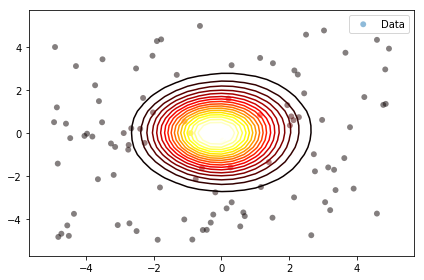

In [8]:
gp.plot()

In [857]:
mv.pdf([0.0,0.0])

0.15915494309189535